In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
print(tf.test.gpu_device_name())
print(tf.test.is_gpu_available())
print('TF Version = {0:s}'.format(tf.__version__))
from tensorflow import keras
#from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()
print ("packs loaded")


/device:GPU:0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
True
TF Version = 2.1.0
packs loaded


In [2]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


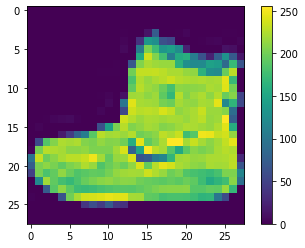

In [3]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

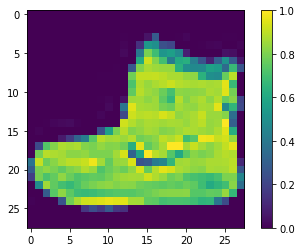

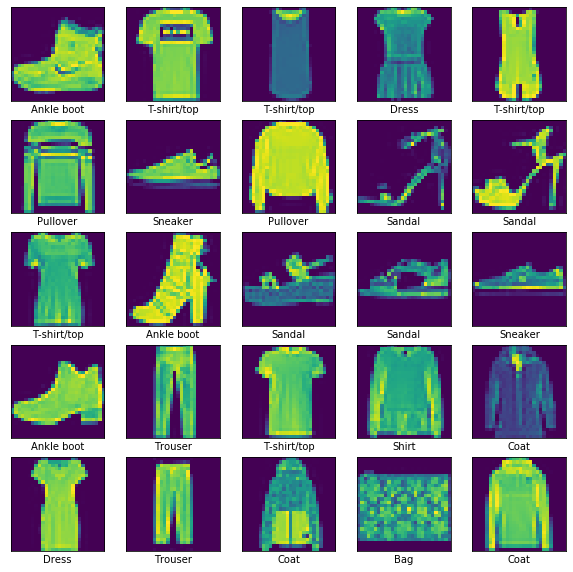

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [4]:
# 对测试数据和训练数据进行预处理(实际上就是归一化)
train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    #plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

#fashion数据集是3维的，不符合卷积的输入要求（4维） 采用如下命令将3维的输入扩展维4维的输入
#np.expand_dims(a, axis=3)表示在3位置添加数据 默认是1
#train_images = np.expand_dims(train_images, axis=3)
#test_images = np.expand_dims(test_images, axis=3)
train_images = train_images.reshape((60000,28,28,1))
test_images = test_images.reshape((10000,28,28,1))
print(train_images.shape)
print(test_images.shape)

In [5]:

#4.构造网络
'''
model = keras.Sequential(
[
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
'''

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 32,kernel_size=(5 ,5),strides = 1, padding = 'same',activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides=(2, 2), padding='same'),
    
    tf.keras.layers.Conv2D(filters = 64, kernel_size=(5 ,5), padding = 'same',activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides=(2, 2), padding='same'),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    #tf.keras.layers.Dropout(rate = 0.5 ),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='sgd',#随机梯度下降和动量优化
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.summary() # 打印模型信息

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               401536    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [7]:
#5.训练与验证
history = model.fit(train_images, train_labels, epochs = 10)
print('history:',history.history)

Train on 60000 samples
Epoch 1/10
  192/60000 [..............................] - ETA: 1:05 - loss: 2.3107 - accuracy: 0.1063

InternalError:  cuDNN launch failure : input shape([32,1,28,28]) filter shape([5,5,1,32])
	 [[node sequential/conv2d/Conv2D (defined at <ipython-input-6-23a0cc1eabb2>:2) ]] [Op:__inference_distributed_function_602]

Function call stack:
distributed_function


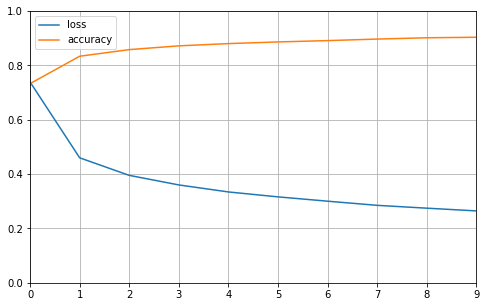

10000/10000 - 3s - loss: 0.3022 - accuracy: 0.8934

Test test_loss: 0.3021583367347717

Test accuracy: 0.8934
(10000, 28, 28, 1)
(10000,)
[1.1777026e-06 1.0852931e-06 2.8832962e-06 1.3178856e-06 2.1520785e-07
 1.0205526e-03 1.9351655e-05 7.0615616e-03 2.2059615e-04 9.9167132e-01]
9
9


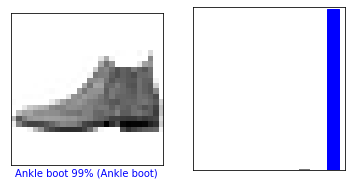

In [7]:
# 将history中的数据以图片表示出来
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.ylim(0,1)
plt.show()

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest test_loss:', test_loss)
print('\nTest accuracy:', test_acc)
print(test_images.shape)
print(test_labels.shape)


#6.预测
predictions = model.predict(test_images)
print(str(predictions[0]))
print(str(np.argmax(predictions[0])))
print(str(test_labels[0]))

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
#plot_image(i, predictions, test_labels, test_images)
plot_image(i, predictions, test_labels, np.squeeze(test_images))
#matplotlib.pyplot.imshow()需要数据是二维的数组或者第三维深度是3或4的三维数组，当第三维深度为1时，使用np.squeeze()压缩数据成为二维数组
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

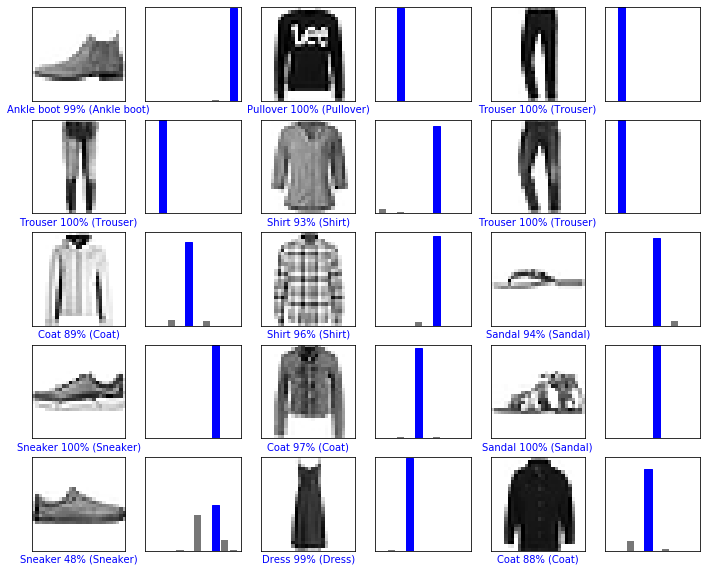

In [8]:
# 可视化结果
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  #plot_image(i, predictions, test_labels, test_images)
  plot_image(i, predictions, test_labels, np.squeeze(test_images))
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

(1, 28, 28, 1)
[[1.1777342e-06 1.0853512e-06 2.8834702e-06 1.3179398e-06 2.1522371e-07
  1.0205354e-03 1.9354356e-05 7.0622801e-03 2.2061134e-04 9.9167061e-01]]


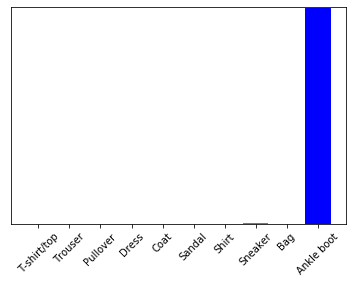

In [9]:
img = test_images[0]

img = (np.expand_dims(img,0))

print(img.shape)
predictions_single = model.predict(img)

print(predictions_single)
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)